In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\thris\\Downloads\\Iconic_Songs_Dataset.csv")
df.head()

,Title,Artist,Genre,ReleaseDate,Duration,Album,Popularity
0,Blinding Lights,The Weeknd,Pop,2024-01-05,3:22,After Hours,95
1,Levitating,Dua Lipa,Pop,2024-01-14,3:23,Future Nostalgia,93
2,Peaches,Justin Bieber ft. Daniel Caesar & Giveon,Pop,2024-02-12,3:18,Justice,91
3,Save Your Tears,The Weeknd,Pop,2024-02-18,3:36,After Hours,92
4,Good 4 U,Olivia Rodrigo,Pop,2024-03-05,2:58,SOUR,94


In [29]:
df.isnull().sum()

Title          0
Artist         0
Genre          0
ReleaseDate    0
Duration       0
Album          2
Popularity     0
dtype: int64

In [33]:
df["Album"].fillna("NA",inplace=True)

In [34]:
df["Album"].isnull().sum()

0

<Axes: xlabel='Popularity', ylabel='Count'>

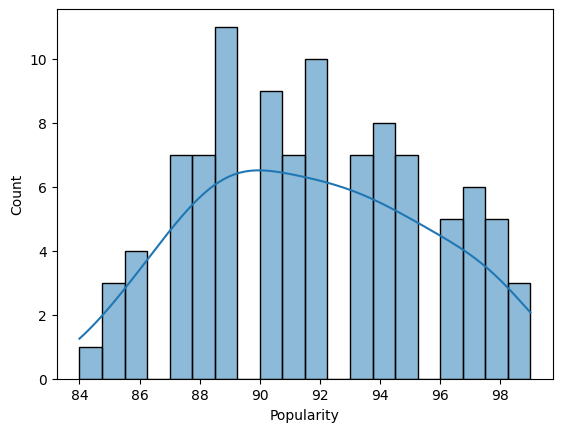

In [5]:
sns.histplot(x="Popularity",data=df,kde=True,bins=20)

Text(0.5, 1.0, 'Top 5 Genres')

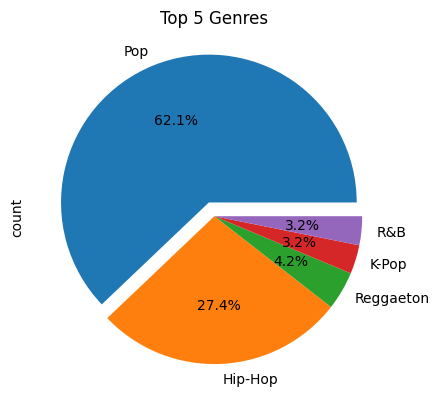

In [13]:
genre_counts = df["Genre"].value_counts().head(5)
explode = [0.1,0,0,0,0]  # Explode the slice with the highest count

genre_counts.plot(kind="pie", autopct='%1.1f%%', explode=explode)
plt.title("Top 5 Genres")

Text(0.5, 1.0, 'Top 10 Artists having high number of songs')

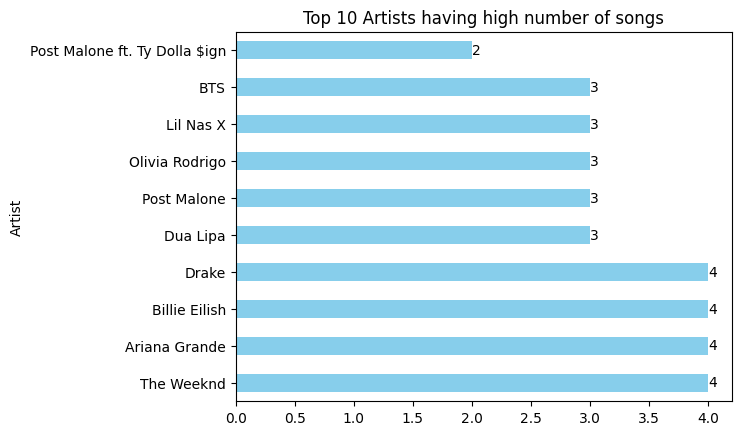

In [27]:
art=df["Artist"].value_counts().head(10)
art.plot(kind="barh",color="skyblue")

for i,v in enumerate(art):
     plt.text(v , i, str(v), color='black', va='center')

plt.title("Top 10 Artists having high number of songs")

Text(0.5, 1.0, 'Top 10 albums with higher number of songs')

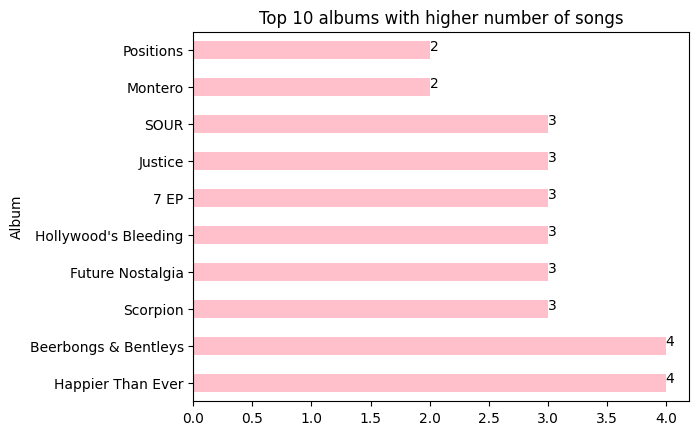

In [38]:
alb=df["Album"].value_counts().head(10)
alb.plot(kind="barh",color="pink")

for i,v in enumerate(alb):
    plt.text(v,i,str(v))

plt.title("Top 10 albums with higher number of songs")

In [39]:
album_name = input("Enter the album name:")

album_df = df[df["Album"] == album_name]

artists = album_df["Artist"].unique()

if len(artists) > 0:
    print("The artist(s) of the album", album_name, "is/are:", ", ".join(artists))
else:
    print("No information available for the album", album_name)


The artist(s) of the album Scorpion is/are: Drake


In [41]:
song_name = input("Enter the album name:")

album_df = df[df["Title"] == song_name]

artists = album_df["Artist"].unique()

if len(artists) > 0:
    print("The artist(s) of the Title", album_name, "is/are:", ", ".join(artists))
else:
    print("No information available for the title", album_name)


The artist(s) of the Title Scorpion is/are: BTS


In [43]:
df.shape

(100, 7)

In [44]:
df["Title"].shape

(100,)

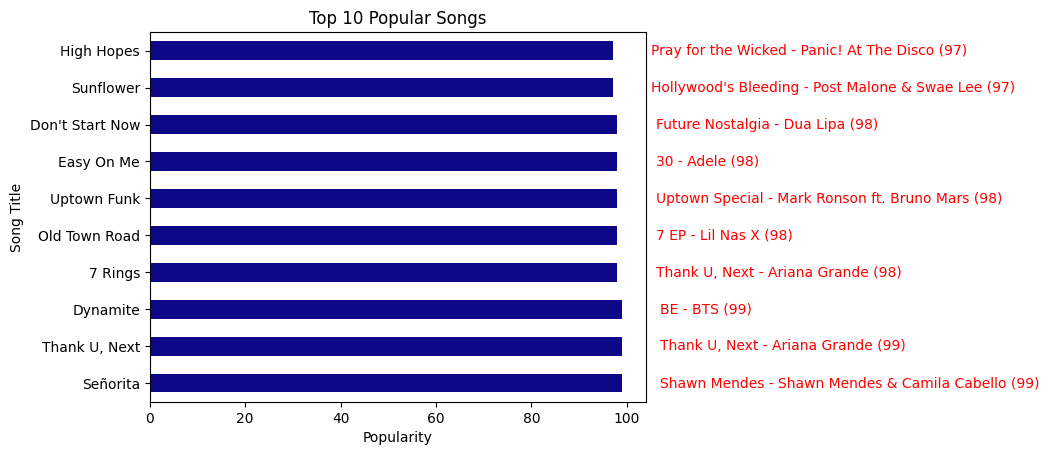

In [60]:
pop=df.groupby("Title")["Popularity"].max().sort_values(ascending=False).head(10)
pop.plot(kind="barh",colormap="plasma")

for i, (index, value) in enumerate(pop.items()):
    artist = df[df["Title"] == index]["Artist"].iloc[0]  # Get the artist of the song
    album = df[df["Title"] == index]["Album"].iloc[0] 
    plt.text(value+8, i, f"{album} - {artist} ({value})", color='red', va='center')  # Concatenate artist with title

plt.title("Top 10 Popular Songs")
plt.xlabel("Popularity")
plt.ylabel("Song Title")
plt.show()

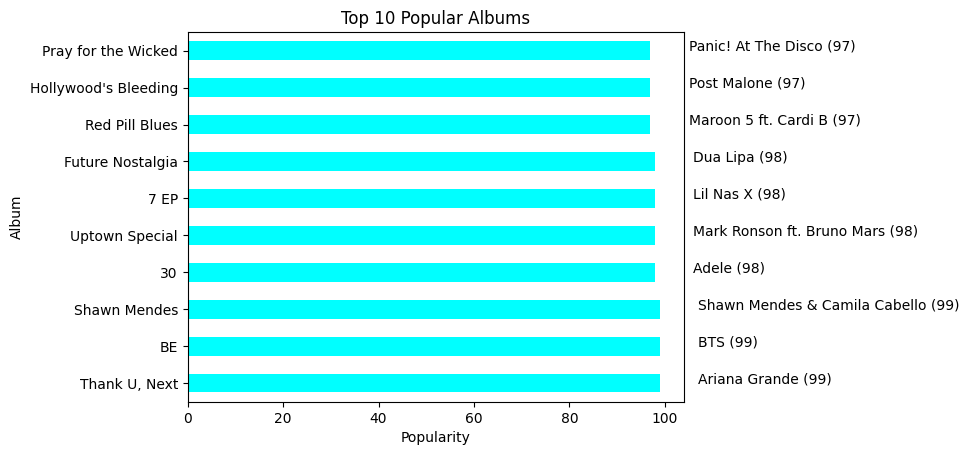

In [74]:
ab=df.groupby("Album")["Popularity"].max().sort_values(ascending=False).head(10)
ab.plot(kind="barh",color="cyan")

for i, (index, value) in enumerate(ab.items()):

    artist = df[df["Album"] == index]["Artist"].iloc[0]
    plt.text(value + 8, i, f"{artist} ({value})")

# Show the plot
plt.xlabel("Popularity")
plt.ylabel("Album")
plt.title("Top 10 Popular Albums")
plt.show()

In [81]:
df.ReleaseDate.astype("str")

0     2024-01-05
1     2024-01-14
2     2024-02-12
3     2024-02-18
4     2024-03-05
         ...    
95    2024-12-15
96    2024-12-20
97    2024-12-25
98    2025-01-01
99    2025-01-05
Name: ReleaseDate, Length: 100, dtype: object

In [82]:
date_parts = df['ReleaseDate'].str.split('-', expand=True)

In [84]:
df["Year"]=date_parts[0]
df.head(1)

,Title,Artist,Genre,ReleaseDate,Duration,Album,Popularity,Year
0,Blinding Lights,The Weeknd,Pop,2024-01-05,3:22,After Hours,95,2024


<Axes: ylabel='count'>

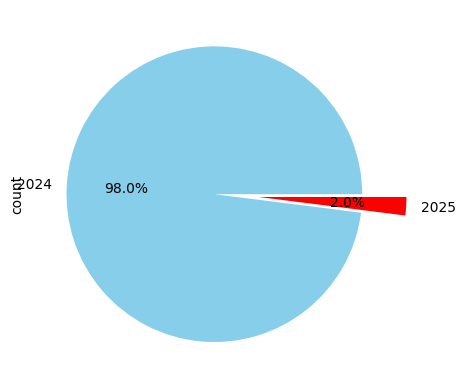

In [92]:
explode=[0,0.3]
color=["skyblue","red"]
df["Year"].value_counts().plot(kind="pie",autopct="%1.1f%%",explode=explode,colors=color)